<center><b>Diagnosing Heart Disease</center></b>

Diagnosis: The diagnosis of heart disease is done on a combination of clinical signs and test results. The types of tests run will be chosen on the basis of what the physician thinks is going on , ranging from electrocardiograms and cardiac computerized tomography (CT) scans, to blood tests and exercise stress tests .

imports libaraies & loadding data

In [23]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.metrics as metrics
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import average_precision_score
from sklearn.datasets import make_classification
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from matplotlib import pyplot

In [2]:
#loading data
heart_data = pd.read_csv('heart.csv')
#take a look
heart_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


Split data into feature data & target data

In [4]:
x = heart_data.drop('target',axis=1)
y = heart_data.target

Data cleaning

Detect null value

In [5]:
x.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
dtype: int64

Split data into train & test data

In [6]:
x_train , x_test , y_train , y_test = train_test_split( x , y , test_size=0.2 , random_state = 42 , stratify = y)

Models

In [24]:
def score(model):
    print('Train result : ')
    print('=='*20)
    print('score for data train : ', log_model.score(x_train , y_train)*100 ,'%')
    print('=='*20)
    y_pred = model.predict(x_train)
    report = classification_report(y_train,y_pred)
    print(report)
    print('=='*20)
    
    print('Test result : ')
    print('=='*20)
    print('score for data test ', log_model.score(x_test , y_test)*100,'%')
    print('=='*20)
    y_pred = model.predict(x_test)
    report = classification_report(y_test,y_pred)
    print(report)
    probs = model.predict_proba(x_test)
    preds = probs[:,1]
    fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
    roc_auc = metrics.auc(fpr, tpr)

    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()
    
    lr_precision, lr_recall, _ = precision_recall_curve(y_test, preds)
    lr_f1, lr_auc = f1_score(y_test, y_pred), auc(lr_recall, lr_precision)
    # summarize scores
    print('f1=%.3f auc=%.3f' % (lr_f1, lr_auc))
    # plot the precision-recall curves
    no_skill = len(y_test[y_test==1]) / len(y_test)
    pyplot.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
    pyplot.plot(lr_recall, lr_precision, marker='.')
    # axis labels
    pyplot.xlabel('Recall')
    pyplot.ylabel('Precision')
    # show the legend
    pyplot.legend()
    # show the plot
    pyplot.show()

1. LogisticRegression model

In [25]:
log_model = LogisticRegression(solver='liblinear')
log_model.fit(x_train, y_train)

LogisticRegression(solver='liblinear')

Train result : 
score for data train :  84.29752066115702 %
              precision    recall  f1-score   support

           0       0.88      0.76      0.82       110
           1       0.82      0.91      0.86       132

    accuracy                           0.84       242
   macro avg       0.85      0.84      0.84       242
weighted avg       0.85      0.84      0.84       242

Test result : 
score for data test  80.32786885245902 %
              precision    recall  f1-score   support

           0       0.86      0.68      0.76        28
           1       0.77      0.91      0.83        33

    accuracy                           0.80        61
   macro avg       0.82      0.79      0.80        61
weighted avg       0.81      0.80      0.80        61



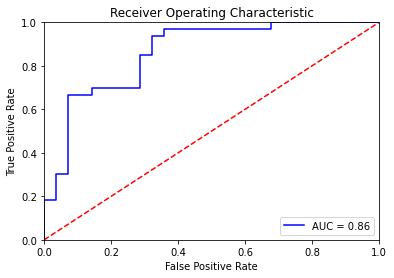

f1=0.833 auc=0.864


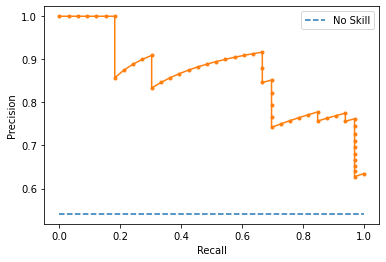

In [26]:
score(log_model)


2. Support Vector machine

In [27]:
svc_model = SVC(C=12,probability=True)
svc_model.fit(x_train , y_train)

SVC(C=12, probability=True)

Train result : 
score for data train :  84.29752066115702 %
              precision    recall  f1-score   support

           0       0.73      0.60      0.66       110
           1       0.71      0.81      0.76       132

    accuracy                           0.71       242
   macro avg       0.72      0.71      0.71       242
weighted avg       0.72      0.71      0.71       242

Test result : 
score for data test  80.32786885245902 %
              precision    recall  f1-score   support

           0       0.67      0.50      0.57        28
           1       0.65      0.79      0.71        33

    accuracy                           0.66        61
   macro avg       0.66      0.64      0.64        61
weighted avg       0.66      0.66      0.65        61



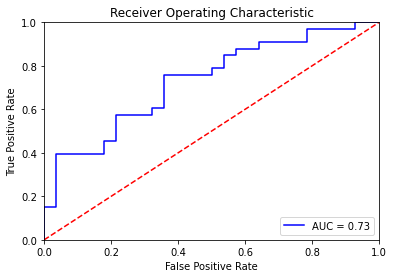

f1=0.712 auc=0.777


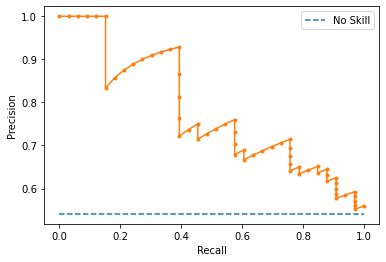

In [28]:
score(svc_model)

3. Decision Tree 

In [29]:
Decision_model = DecisionTreeClassifier(max_depth=4)
Decision_model.fit(x_train , y_train)

DecisionTreeClassifier(max_depth=4)

Train result : 
score for data train :  84.29752066115702 %
              precision    recall  f1-score   support

           0       0.93      0.85      0.89       110
           1       0.89      0.95      0.92       132

    accuracy                           0.90       242
   macro avg       0.91      0.90      0.90       242
weighted avg       0.91      0.90      0.90       242

Test result : 
score for data test  80.32786885245902 %
              precision    recall  f1-score   support

           0       0.83      0.71      0.77        28
           1       0.78      0.88      0.83        33

    accuracy                           0.80        61
   macro avg       0.81      0.80      0.80        61
weighted avg       0.81      0.80      0.80        61



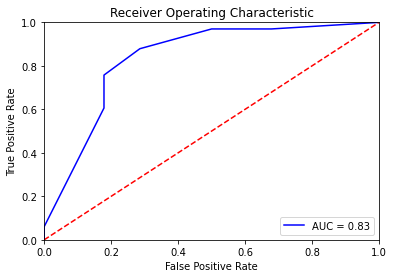

f1=0.829 auc=0.858


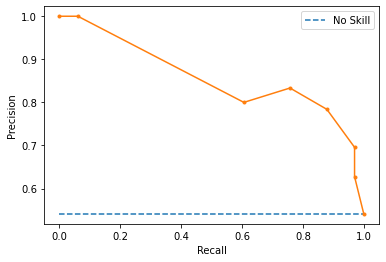

In [30]:
score(Decision_model)

4. Random Forest Classifier 

In [31]:
rand_forest_model = RandomForestClassifier(max_depth = 4)
rand_forest_model.fit(x_train, y_train)

RandomForestClassifier(max_depth=4)

Train result : 
score for data train :  84.29752066115702 %
              precision    recall  f1-score   support

           0       0.94      0.85      0.90       110
           1       0.89      0.95      0.92       132

    accuracy                           0.91       242
   macro avg       0.91      0.90      0.91       242
weighted avg       0.91      0.91      0.91       242

Test result : 
score for data test  80.32786885245902 %
              precision    recall  f1-score   support

           0       0.95      0.64      0.77        28
           1       0.76      0.97      0.85        33

    accuracy                           0.82        61
   macro avg       0.85      0.81      0.81        61
weighted avg       0.85      0.82      0.81        61



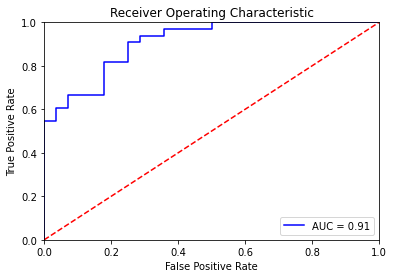

f1=0.853 auc=0.925


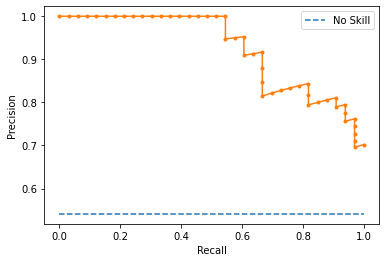

In [32]:
score(rand_forest_model)